# task 1


In [1]:
import pandas as pd 

In [12]:
data = pd.read_csv("winequality-white.csv",delimiter=";")

In [15]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
print(data.shape[0])
print(data.shape[1])

4898
12


In [34]:
xdata = data.loc[:,'fixed acidity':'alcohol']
ydata = data['quality']

In [35]:
xdata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [36]:
ydata.name

'quality'

In [19]:
data.describe()["quality"]

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [21]:
data["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [127]:
from sklearn.utils import shuffle

In [128]:
white_wine = shuffle(data,random_state=20)

In [129]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3994,6.7,0.280,0.34,8.90,0.048,32.0,111.0,0.99455,3.25,0.54,11.0,7
2540,9.0,0.290,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5
4030,6.9,0.190,0.38,1.15,0.023,30.0,105.0,0.99047,3.11,0.38,11.4,5
952,6.5,0.170,0.33,1.40,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,6
1968,7.6,0.200,0.31,1.40,0.047,41.0,142.0,0.99340,3.43,0.53,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1607,5.8,0.190,0.49,4.90,0.040,44.0,118.0,0.99350,3.34,0.38,9.5,7
3915,4.7,0.455,0.18,1.90,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7
1428,8.2,0.180,0.49,1.10,0.033,28.0,81.0,0.99230,3.00,0.68,10.4,7
4367,7.1,0.310,0.25,11.20,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5


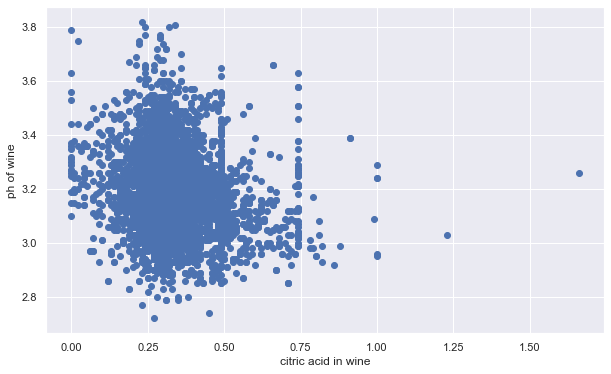

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['citric acid'], y = data['pH'])
plt.xlabel("citric acid in wine")
plt.ylabel("ph of wine")

plt.show()

# Task 2

In [143]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(white_wine)
scaler


StandardScaler()

In [144]:
white_wine = scaler.transform(white_wine)

In [159]:
x_white_wine=white_wine[:,:-1]
y=white_wine[:,-1]

In [160]:
x_white_wine.shape
y.shape

(4898,)

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
results = pca.fit(x_white_wine) 
Z_white_wine = results.transform(x_white_wine) 


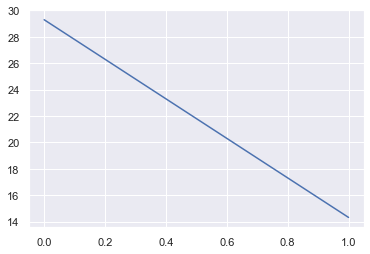

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.plot(results.explained_variance_ratio_*100)
plt.show()


In [153]:
wine_df = pd.DataFrame(data = Z_white_wine
             , columns = ['PC 1', 'PC 2'])

In [154]:
wine_df

,PC 1,PC 2
0,-0.225880,0.204562
1,1.612328,-1.547740
2,-1.915400,-1.038386
3,-1.498166,-0.100387
4,-0.318392,0.638701
...,...,...
4893,-0.139587,0.673899
4894,-3.651072,2.435017
4895,-0.838648,-2.244058
4896,1.105519,-0.303234


In [165]:
y_df = pd.DataFrame(data =y,columns=["quality"])


In [195]:
finalDf = pd.concat([wine_df,data["quality"]] , axis = 1)

In [196]:
finalDf

,PC 1,PC 2,quality
0,-0.225880,0.204562,6
1,1.612328,-1.547740,6
2,-1.915400,-1.038386,6
3,-1.498166,-0.100387,6
4,-0.318392,0.638701,6
...,...,...,...
4893,-0.139587,0.673899,6
4894,-3.651072,2.435017,5
4895,-0.838648,-2.244058,6
4896,1.105519,-0.303234,7


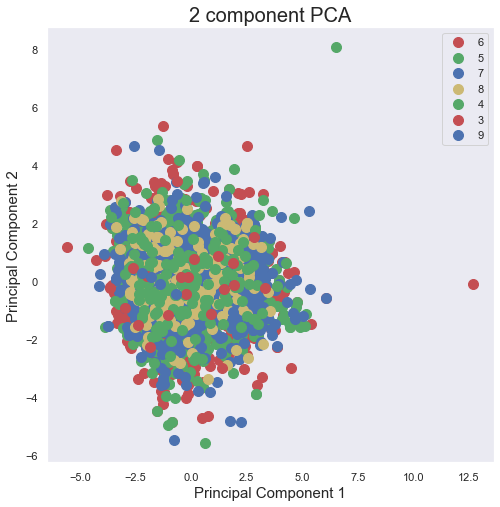

In [197]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [6,5, 7,8,4,3,9]
colors = ['r', 'g', 'b','y','g','r','b','black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

In [202]:
results.explained_variance_*100

array([322.29118963, 157.55616056])

## Task 3

In [174]:
white_wine

array([[-0.18344508,  0.01745194,  0.04800112, ...,  0.43949948,
         0.394746  ,  1.2671142 ],
       [ 2.54237721,  0.11667379,  0.04800112, ..., -0.17392121,
         0.06967355, -0.99137392],
       [ 0.05358295, -0.87554465,  0.37855928, ..., -0.96260494,
         0.71981845, -0.99137392],
       ...,
       [ 1.59426511, -0.9747665 ,  1.28759423, ...,  1.66634084,
        -0.09286267,  1.2671142 ],
       [ 0.29061097,  0.31511748, -0.69575474, ..., -0.78734189,
        -0.82427568, -0.99137392],
       [ 0.527639  , -1.07398834, -0.77839428, ..., -0.96260494,
        -0.09286267,  2.39635826]])

In [186]:
validation_set = white_wine[:1000,:]


In [187]:
test_set = white_wine[-1000:,:]

In [188]:
test_set.shape

(1000, 12)

In [192]:
train_set = white_wine[1000:-1000,:]

In [193]:
train_set.shape

(2898, 12)

In [191]:
validation_set.shape

(1000, 12)